In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('D:/ML/Summer22_FootballTransfers.csv')
df


,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,€10.00m,9/1/2022
...,...,...,...,...,...,...,...,...,...,...,...
33620,Nursultan Nurlanuly,Central Midfield,20.0,Baikonur Kyzylorda,Pervaya Liga,Kazakhstan,Without Club,NaN,NaN,€10Th.,7/1/2022
33621,Ovidiu Agapie,Left Winger,17.0,Ripensia Timisoara U19,Romania,Romania,Ripensia Timisoara,Liga 2,Romania,€10Th.,7/1/2022
33622,Rares Butnarasu,Right-Back,16.0,Ripensia Timisoara U19,Romania,Romania,Ripensia Timisoara,Liga 2,Romania,€10Th.,7/1/2022
33623,Marin Petkov,attack,18.0,Cherno More Varna U19,Bulgaria,Bulgaria,Cherno More Varna II,Bulgaria,Bulgaria,€10Th.,7/1/2022


In [148]:
# transform cost from categorical to float
df['cost']=df['cost'].str.replace("€",'').str.replace('m',"0000").str.replace(".","").str.replace("Th","000").astype('float64',copy= True)
df.head(10)

C:\Users\7fno\AppData\Local\Temp\ipykernel_2292\633244784.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['cost']=df['cost'].str.replace("€",'').str.replace('m',"0000").str.replace(".","").str.replace("Th","000").astype('float64',copy= True)


,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000.0,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000.0,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000.0,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000.0,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000.0,9/1/2022
5,Leander Dendoncker,Defensive Midfield,27.0,Wolverhampton Wanderers,Premier League,England,Aston Villa,Premier League,England,28000000.0,9/1/2022
6,Gaëtan Laborde,Centre-Forward,28.0,Stade Rennais FC,Ligue 1,France,OGC Nice,Ligue 1,France,18000000.0,9/1/2022
7,Pierre-Emerick Aubameyang,Centre-Forward,33.0,FC Barcelona,LaLiga,Spain,Chelsea FC,Premier League,England,15000000.0,9/1/2022
8,Jörgen Strand Larsen,Centre-Forward,22.0,FC Groningen,Eredivisie,Netherlands,Celta de Vigo,LaLiga,Spain,6000000.0,9/1/2022
9,Billy Gilmour,Central Midfield,21.0,Chelsea FC,Premier League,England,Brighton & Hove Albion,Premier League,England,12000000.0,9/1/2022


In [149]:
df.drop_duplicates()
print(df.duplicated().sum())
df.shape

0


(33625, 11)

In [150]:
df.dropna(subset=['position','cost'],inplace = True)
df.shape

(33611, 11)

In [151]:
X = df.drop('cost' , axis = 1).drop('name',axis = 1)
y = df.cost

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X , y ,test_size=.3 ,random_state = 0)
print(X_train.shape)
print(X_test.shape)


(23527, 9)
(10084, 9)


## Feature Engineering  to age

In [153]:
def diagnostic_plots(data, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(data[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt,)
    plt.ylabel('age quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')
    
    plt.show()

C:\Users\7fno\AppData\Local\Temp\ipykernel_2292\1609239611.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


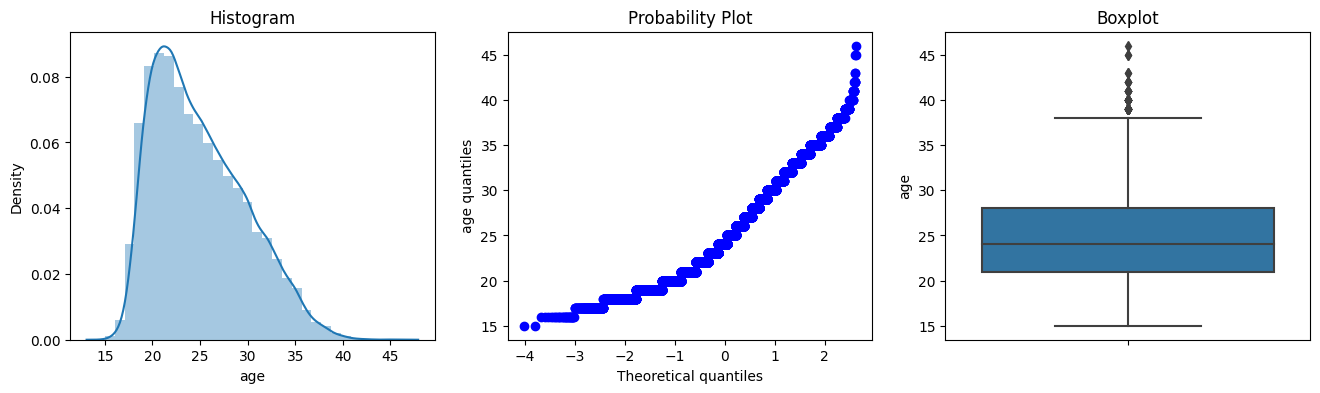

In [154]:
b= diagnostic_plots(X_train,'age')

 Age is not normaly distributed 

In [155]:
X_train.age.isna().mean()

0.004335444383049262

comparing between mean and median for age


In [156]:
def impute_na (df,variable,mean_median):
    return df[variable].fillna(mean_median)

In [157]:
mean = X_train['age'].mean()
median = X_train['age'].median()

In [158]:
X_train['Age_median'] = impute_na(X_train,'age',median)


X_train['Age_mean'] = impute_na(X_train, 'age', mean)

print('the sum of Nans is {}'.format(X_train['Age_mean'].isnull().sum()))

the sum of Nans is 0


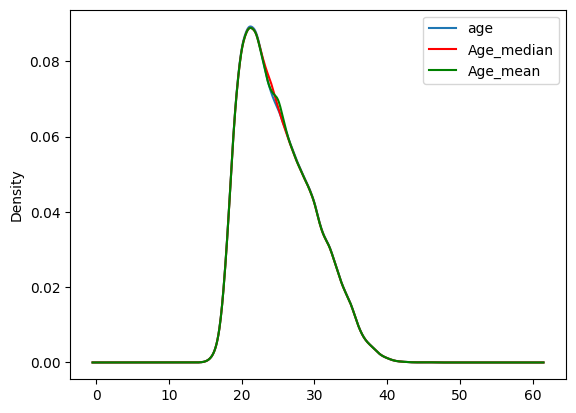

In [159]:
#comparing between mean and median
fig = plt.figure()
ax = plt.subplot()
X_train['age'].plot(kind='kde', ax=ax)
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)


In [160]:
print(f'The Original Variance is :{X_train.age.var()}')
print(f'The Mean variance is :{X_train.Age_mean.var()}')
print(f'The Median variance is : {X_train.Age_median.var()}')

The Original Variance is :22.95704275431414
The Mean variance is :22.857509541658356
The Median variance is : 22.861999457766828


In [161]:
X_train['Age_random'] = X_train['age'].copy()
X_test['Age_random'] = X_test['age'].copy()
random_sample_train = X_train['age'].dropna().sample(X_train['age'].isnull().sum(), random_state = 0)
random_sample_test = X_train['age'].dropna().sample(X_test['age'].isnull().sum(),random_state = 0)
random_sample_train.index = X_train[X_train['age'].isnull()].index
random_sample_test.index = X_test[X_test['age'].isnull()].index
X_train.loc[X_train['age'].isnull(), 'Age_random'] = random_sample_train
X_test.loc [X_test['age'].isnull(),'Age_random'] = random_sample_test

In [162]:
print(f'The Original Variance is :{X_train.age.var()}')
print(f'The Mean variance is :{X_train.Age_mean.var()}')
print(f'The Median variance is : {X_train.Age_median.var()}')
print(f'The random variance is :{ X_train.Age_random.var()}')


The Original Variance is :22.95704275431414
The Mean variance is :22.857509541658356
The Median variance is : 22.861999457766828
The random variance is :22.956286905108698


## the best variance is random


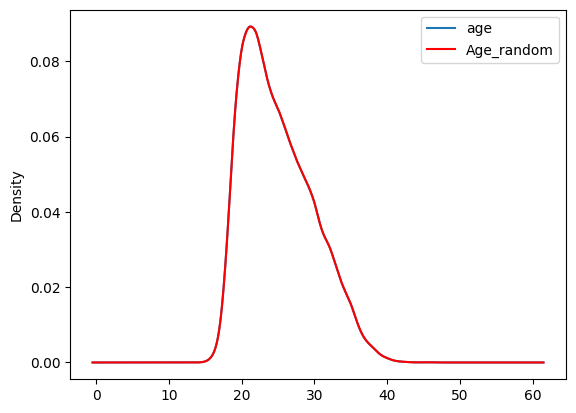

In [163]:

fig = plt.figure()
ax = fig.add_subplot(111)

X_train.age.plot(kind = 'kde',ax = ax)
X_train['Age_random'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

C:\Users\7fno\AppData\Local\Temp\ipykernel_2292\1609239611.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


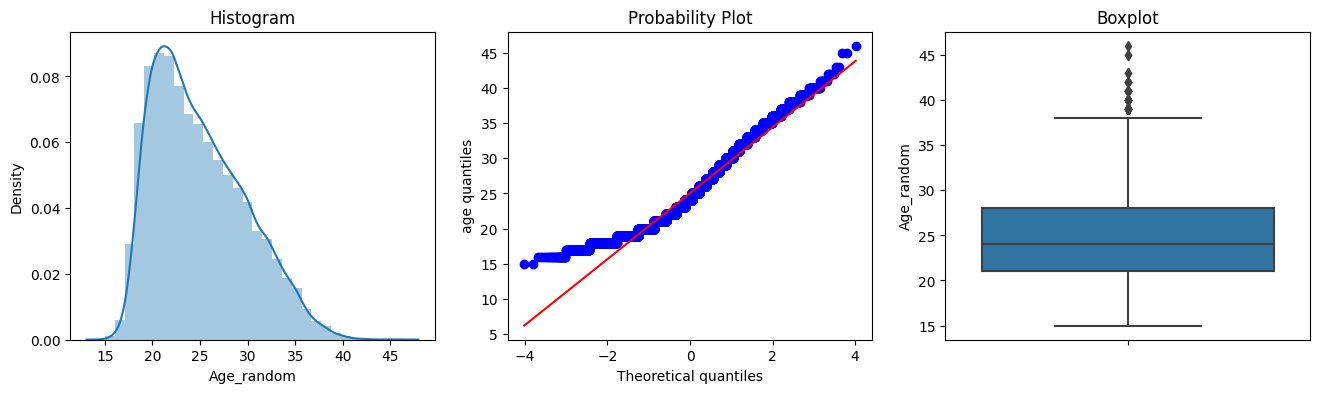

In [164]:
c = diagnostic_plots(X_train,'Age_random')

In [165]:
X_train['age'] = X_train['Age_random'].copy()
X_test['age'] = X_test['Age_random'].copy()

In [166]:
print(X_train['age'].isna().sum())
print(X_test['age'].isna().sum())

0
0


## Discersation to age

In [167]:
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

disc.fit(X_train[['age']])
X_train.age = disc.transform(X_train[['age']])
train_t = pd.DataFrame(X_train, columns = ['age'])
X_test.age  = disc.transform(X_test[['age']])
test_t=pd.DataFrame(X_test, columns = ['age'])

In [168]:
disc.bin_edges_

array([array([15., 19., 21., 22., 23., 24., 26., 27., 29., 32., 46.])],
      dtype=object)

Text(0, 0.5, 'Number of observations per bin')

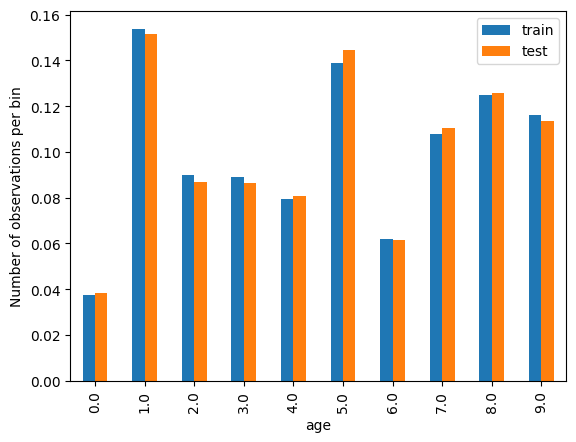

In [169]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.ylabel('Number of observations per bin')

C:\Users\7fno\AppData\Local\Temp\ipykernel_2292\1609239611.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


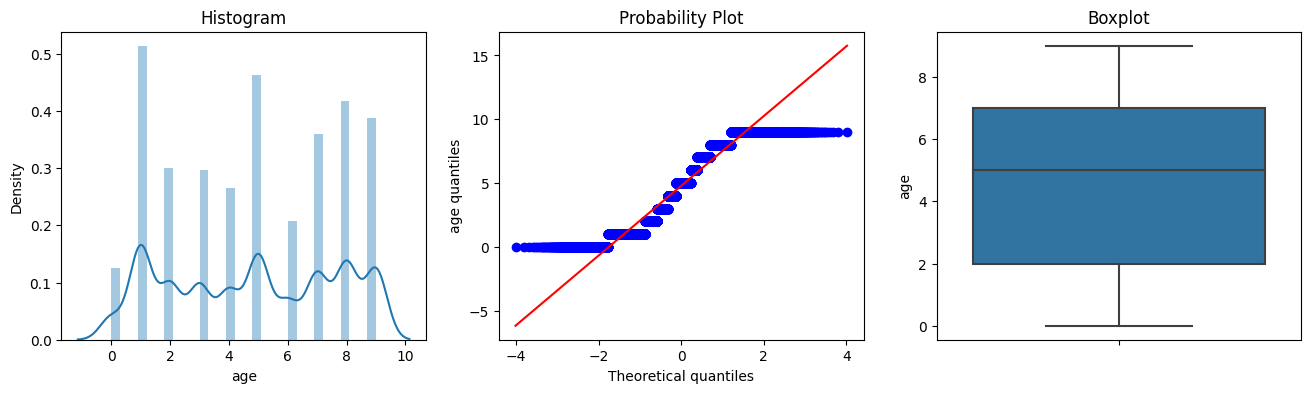

In [170]:
c = diagnostic_plots(X_train,'age')

In [171]:
X_train = X_train.drop('Age_mean',axis = 1).drop('Age_median',axis = 1).drop('Age_random',axis = 1)
X_test = X_test.drop('Age_random',axis = 1)

In [172]:
X_train

,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,date_of_transfer
3913,Centre-Back,4.0,CD Feirense,Liga Sabseg,Portugal,Boavista FC,Liga Portugal,Portugal,8/17/2022
11397,Centre-Forward,7.0,Boluspor,1.Lig,Turkey,Sanliurfaspor,2.Lig Beyaz,Turkey,7/22/2022
21703,Defensive Midfield,8.0,CD Municipal Limeño,El Salvador,El Salvador,Santa Tecla FC,Primera División Apertura,El Salvador,7/1/2022
21707,Right-Back,6.0,SV Waldhof Mannheim,3. Liga,Germany,FC Ingolstadt 04,3. Liga,Germany,7/1/2022
28118,Second Striker,9.0,NK Maribor,Prva Liga,Slovenia,Retired,NaN,NaN,7/1/2022
...,...,...,...,...,...,...,...,...,...
20762,Left Winger,8.0,Eyüpspor,1.Lig,Turkey,Bandirmaspor,1.Lig,Turkey,7/1/2022
32117,Centre-Forward,1.0,Alessandria Primavera,Primavera 2 - A,Italy,Without Club,NaN,NaN,7/1/2022
30417,Centre-Back,3.0,VfB Lübeck,Regionalliga Nord,Germany,Without Club,NaN,NaN,7/1/2022
21252,Centre-Back,8.0,Buducnost Podgorica,1. CFL,Montenegro,FK Decic Tuzi,1. CFL,Montenegro,7/1/2022


## The End of feature engineering to the feature age

1- reduce cardinality of position

In [173]:
X_train['position'].unique()


array(['Centre-Back', 'Centre-Forward', 'Defensive Midfield',
       'Right-Back', 'Second Striker', 'Goalkeeper', 'Left-Back',
       'Attacking Midfield', 'Central Midfield', 'Right Winger',
       'Left Winger', 'attack', 'midfield', 'Right Midfield',
       'Left Midfield', 'defence'], dtype=object)

In [174]:
# Reducing Cardinality
X_train['position'] = X_train['position'].str.replace('Left-Back','Defence').str.replace('defence','Defence').str.replace('Centre-Back','Defence').str.replace('Right-Back','Defence').str.replace('midfield','Midfield').str.replace('Left Midfield','Midfield').str.replace('Defensive Midfield','Midfield').str.replace('Right Midfield','Midfield').str.replace('Central Midfield','Midfield').str.replace('Attacking Midfield','Midfield').str.replace('attack','Attack').str.replace('Left Winger','Attack').str.replace('Centre-Forward','Attack').str.replace('Right Winger','Attack').str.replace('Second Striker','Attack')
X_test['position'] = X_test['position'].str.replace('Left-Back','Defence').str.replace('defence','Defence').str.replace('Centre-Back','Defence').str.replace('Right-Back','Defence').str.replace('midfield','Midfield').str.replace('Left Midfield','Midfield').str.replace('Defensive Midfield','Midfield').str.replace('Right Midfield','Midfield').str.replace('Central Midfield','Midfield').str.replace('Attacking Midfield','Midfield').str.replace('attack','Attack').str.replace('Left Winger','Attack').str.replace('Centre-Forward','Attack').str.replace('Right Winger','Attack').str.replace('Second Striker','Attack')

In [175]:
X_train.position.unique()

array(['Defence', 'Attack', 'Midfield', 'Goalkeeper'], dtype=object)

In [176]:
print(X_train.position.isna().mean())
print(X_test.position.isna().mean())
print(X_train.position.shape)
# The mean of nans is : 0003823766835195649 so we will drop it

0.0
0.0
(23527,)


In [177]:
X_train.dropna(subset = ['position'],inplace=True)
X_test.dropna(subset = ['position'],inplace=True)

In [178]:
print(X_train.position.shape)
print(X_test.position.shape)

(23527,)
(10084,)


In [179]:
# from feature_engine.imputation import DropMissingData
# drop = DropMissingData(variables=['position'])
# drop.fit(X_train)
# tmp = drop.transform(X_train)
# tmp.isna().mean()

Encoding to position

In [180]:
X_train.position.unique()

array(['Defence', 'Attack', 'Midfield', 'Goalkeeper'], dtype=object)

In [181]:
from category_encoders.target_encoder import TargetEncoder
encoding = TargetEncoder()
encoding.fit(X = X_train['position'],y = y_train)
tmp = encoding.transform(X=X_train['position'])
X_train['position'] = tmp
temp = encoding.transform(X=X_test['position'])
X_test['position'] = temp

c:\Users\7fno\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
c:\Users\7fno\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [182]:
X_train.head(10)

,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,date_of_transfer
3913,474285.615299,4.0,CD Feirense,Liga Sabseg,Portugal,Boavista FC,Liga Portugal,Portugal,8/17/2022
11397,596420.413990,7.0,Boluspor,1.Lig,Turkey,Sanliurfaspor,2.Lig Beyaz,Turkey,7/22/2022
21703,481290.625451,8.0,CD Municipal Limeño,El Salvador,El Salvador,Santa Tecla FC,Primera División Apertura,El Salvador,7/1/2022
21707,474285.615299,6.0,SV Waldhof Mannheim,3. Liga,Germany,FC Ingolstadt 04,3. Liga,Germany,7/1/2022
28118,596420.413990,9.0,NK Maribor,Prva Liga,Slovenia,Retired,NaN,NaN,7/1/2022
27554,252398.237516,0.0,III. Kerület TVE Budapest,Hungary,Hungary,MTK Budapest,NB II.,Hungary,7/1/2022
12811,596420.413990,8.0,CSC Dumbravita,Liga 2,Romania,CSC Ghiroda si Giarmata Vii,Romania,Romania,7/19/2022
3555,474285.615299,7.0,NK GOSK Gabela,Prva liga FBIH,Bosnia-Herzegovina,NK Opatija,Croatia,Croatia,8/18/2022
21686,474285.615299,6.0,Montpellier HSC,Ligue 1,France,SL Benfica,Liga Portugal,Portugal,7/1/2022
28605,474285.615299,9.0,Dobrudzha Dobrich,Vtora Liga,Bulgaria,Without Club,NaN,NaN,7/1/2022


C:\Users\7fno\AppData\Local\Temp\ipykernel_2292\832514638.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = temp.corr()


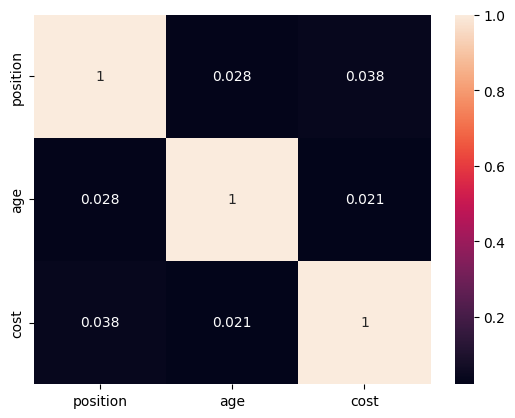

In [183]:
temp = pd.concat([X_train,y_train],axis = 'columns')

cormat = temp.corr()

sns.heatmap(cormat,annot = True)
plt.show()

C:\Users\7fno\AppData\Local\Temp\ipykernel_2292\1609239611.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


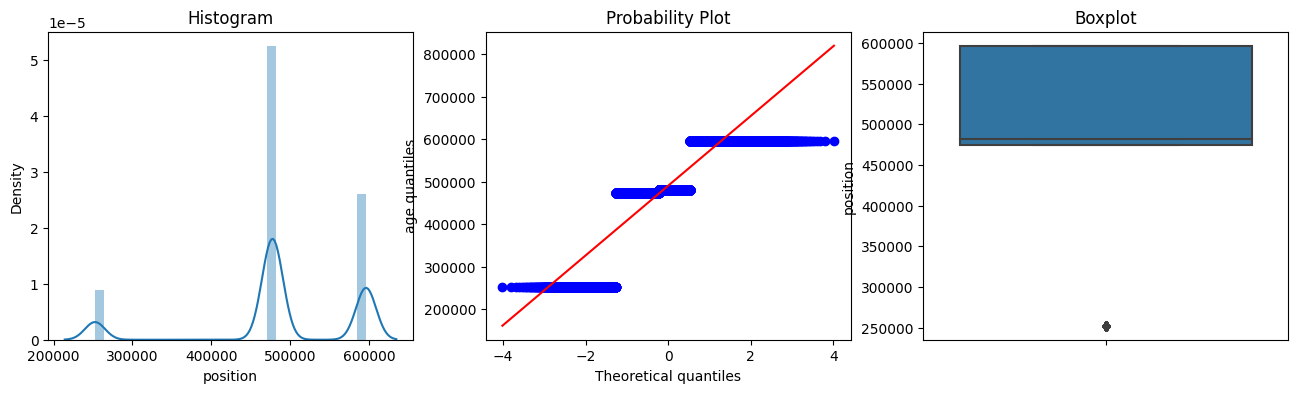

In [184]:
c =diagnostic_plots(X_train,'position')

## Feature Engineering to the rest of the elements


In [185]:
rare_origin = pd.concat([X_train['origin_club'],X_train['league_origin_club'],X_train['country_origin_club']], axis = 1)
rare_origin

,origin_club,league_origin_club,country_origin_club
3913,CD Feirense,Liga Sabseg,Portugal
11397,Boluspor,1.Lig,Turkey
21703,CD Municipal Limeño,El Salvador,El Salvador
21707,SV Waldhof Mannheim,3. Liga,Germany
28118,NK Maribor,Prva Liga,Slovenia
...,...,...,...
20762,Eyüpspor,1.Lig,Turkey
32117,Alessandria Primavera,Primavera 2 - A,Italy
30417,VfB Lübeck,Regionalliga Nord,Germany
21252,Buducnost Podgorica,1. CFL,Montenegro


In [186]:
label_freq = X_train['country_origin_club'].value_counts()/len(X_train['country_origin_club'])
label_freq.sort_values(ascending=False)

Italy         0.141497
Spain         0.075573
Germany       0.052153
Russia        0.041527
Turkey        0.033068
                ...   
Tanzania      0.000043
Uganda        0.000043
The Gambia    0.000043
Congo         0.000043
Guadeloupe    0.000043
Name: country_origin_club, Length: 144, dtype: float64

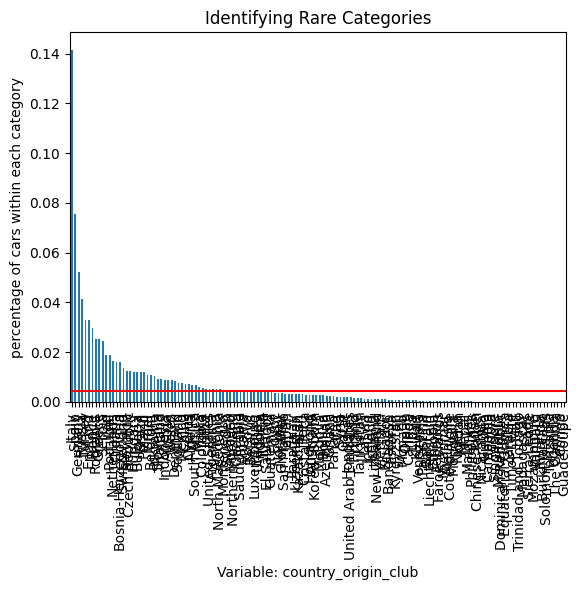

In [187]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.0043, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: country_origin_club')
fig.set_title('Identifying Rare Categories')
plt.show()

In [188]:
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby(variable)[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare


In [189]:
find_non_rare_labels(X_train,'country_origin_club',.02)

['England',
 'France',
 'Germany',
 'Greece',
 'Italy',
 'Romania',
 'Russia',
 'Serbia',
 'Spain',
 'Turkey']

In [190]:
find_non_rare_labels(X_train,'origin_club',.001)

['Atalanta BC',
 'FK Proleter Novi Sad',
 'Genoa CFC',
 'Inter Milan',
 'Juventus Next Gen',
 'US Sassuolo',
 'Unknown',
 'Without Club']

In [191]:
find_non_rare_labels(X_train,'league_origin_club',.01)

['Bundesliga',
 'Italy',
 'Liga 2',
 'Premier League',
 'Premier Liga',
 'Romania',
 'Russia',
 'Serie A',
 'Serie B',
 'Spain']

In [192]:
X_train['league_origin_club'] = X_train['league_origin_club'].str.replace('Italy','Serie A').str.replace('Spain','LaLiga')
find_non_rare_labels(X_train,'league_origin_club',.01)

['Bundesliga',
 'LaLiga',
 'Liga 2',
 'Premier League',
 'Premier Liga',
 'Romania',
 'Russia',
 'Serie A',
 'Serie B']

In [193]:
find_non_rare_labels(X_train,'new_club',.0009)

['Career break', 'Retired', 'Unknown', 'Without Club']

In [194]:
find_non_rare_labels(X_train,'league_new_club',.0095)
X_train['league_new_club'] = X_train['league_new_club'].str.replace('Italy','Serie A').str.replace('Spain','LaLiga')

In [195]:
find_non_rare_labels(X_train,'country_new_club',.02)

['England',
 'France',
 'Germany',
 'Italy',
 'Romania',
 'Russia',
 'Serbia',
 'Spain',
 'Turkey']

In [196]:
def rare_encoding(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

In [197]:
X_train,X_test = rare_encoding(X_train,X_test,'origin_club',.001)
X_train['origin_club'].unique()

array(['Rare', 'Without Club', 'Unknown', 'Inter Milan', 'Atalanta BC',
       'Juventus Next Gen', 'FK Proleter Novi Sad', 'Genoa CFC',
       'US Sassuolo'], dtype=object)

In [198]:
X_train,X_test = rare_encoding(X_train,X_test,'country_origin_club',.02)
X_test['country_origin_club'].unique()

array(['Rare', 'Turkey', 'Romania', 'Spain', 'Italy', 'Germany',
       'England', 'Serbia', 'France', 'Russia', 'Greece'], dtype=object)

In [199]:
X_train,X_test = rare_encoding(X_train,X_test,'league_origin_club',.01)
X_train['league_origin_club'].unique()

array(['Rare', 'Liga 2', 'Bundesliga', 'Serie A', 'LaLiga',
       'Premier Liga', 'Premier League', 'Romania', 'Russia', 'Serie B'],
      dtype=object)

In [200]:
X_train,X_test = rare_encoding(X_train,X_test,'new_club',.0009)
X_train.new_club.unique()

array(['Rare', 'Retired', 'Without Club', 'Unknown', 'Career break'],
      dtype=object)

In [201]:
X_train,X_test = rare_encoding(X_train,X_test,'country_new_club',.02)
X_train.country_new_club.unique()

array(['Rare', 'Turkey', 'Germany', 'Romania', 'Italy', 'Russia',
       'Serbia', 'France', 'Spain', 'England'], dtype=object)

In [202]:
X_train,X_test = rare_encoding(X_train,X_test,'league_new_club',.0095)
X_train.league_new_club.unique()

array(['Rare', 'Romania', 'Serie A', 'LaLiga', 'League One',
       'Premier Liga', 'Premier League', 'Liga 2'], dtype=object)

In [203]:
for var in ['origin_club','new_club','league_origin_club','country_origin_club','league_new_club','country_new_club']:
    from category_encoders.target_encoder import TargetEncoder
    encoding = TargetEncoder()
    encoding.fit(X = X_train[var],y = y_train)
    tmp = encoding.transform(X=X_train[var])
    X_train[var] = tmp
    temp = encoding.transform(X=X_test[var])
    X_test[var] = temp

c:\Users\7fno\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
c:\Users\7fno\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
c:\Users\7fno\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in

In [204]:
X_train

,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,date_of_transfer
3913,474285.615299,4.0,487577.698538,3.228226e+05,320982.128218,555306.627859,351602.890146,286493.541994,8/17/2022
11397,596420.413990,7.0,487577.698538,3.228226e+05,330584.832905,555306.627859,351602.890146,552314.560440,7/22/2022
21703,481290.625451,8.0,487577.698538,3.228226e+05,320982.128218,555306.627859,351602.890146,286493.541994,7/1/2022
21707,474285.615299,6.0,487577.698538,3.228226e+05,881263.243684,555306.627859,351602.890146,908239.921337,7/1/2022
28118,596420.413990,9.0,487577.698538,3.228226e+05,320982.128218,121260.000000,351602.890146,286493.541994,7/1/2022
...,...,...,...,...,...,...,...,...,...
20762,596420.413990,8.0,487577.698538,3.228226e+05,330584.832905,555306.627859,351602.890146,552314.560440,7/1/2022
32117,596420.413990,1.0,487577.698538,3.228226e+05,472541.303695,173221.181147,351602.890146,286493.541994,7/1/2022
30417,474285.615299,3.0,487577.698538,3.228226e+05,881263.243684,173221.181147,351602.890146,286493.541994,7/1/2022
21252,474285.615299,8.0,487577.698538,3.228226e+05,320982.128218,555306.627859,351602.890146,286493.541994,7/1/2022


In [205]:
X_test

,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,date_of_transfer
32484,474285.615299,1.0,487577.698538,322822.560457,320982.128218,173221.181147,3.516029e+05,286493.541994,7/1/2022
10739,474285.615299,1.0,487577.698538,322822.560457,320982.128218,555306.627859,3.516029e+05,286493.541994,7/25/2022
7715,252398.237516,3.0,487577.698538,322822.560457,320982.128218,555306.627859,3.516029e+05,286493.541994,8/2/2022
4290,596420.413990,6.0,487577.698538,322822.560457,330584.832905,555306.627859,3.516029e+05,552314.560440,8/15/2022
27509,596420.413990,1.0,487577.698538,322822.560457,320982.128218,555306.627859,3.516029e+05,286493.541994,7/1/2022
...,...,...,...,...,...,...,...,...,...
12324,474285.615299,7.0,487577.698538,127478.813559,368659.160696,555306.627859,3.516029e+05,283450.000000,7/20/2022
3686,474285.615299,3.0,487577.698538,41430.976431,130158.862876,173221.181147,3.516029e+05,286493.541994,8/18/2022
13900,481290.625451,6.0,487577.698538,322822.560457,320982.128218,555306.627859,3.516029e+05,286493.541994,7/16/2022
29452,474285.615299,6.0,487577.698538,322822.560457,472541.303695,173221.181147,3.516029e+05,286493.541994,7/1/2022


C:\Users\7fno\AppData\Local\Temp\ipykernel_2292\1609239611.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


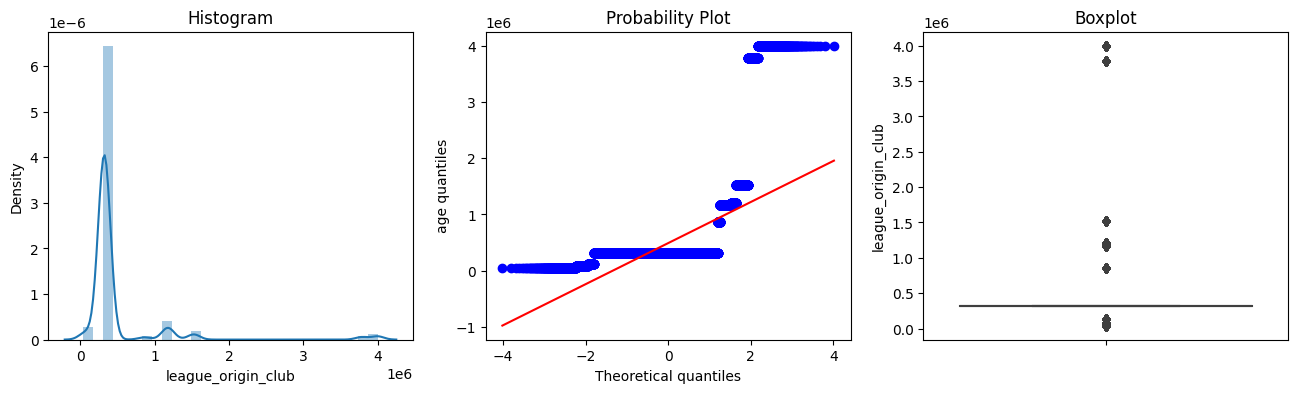

In [206]:
d= diagnostic_plots(X_train,'league_origin_club')

In [207]:
X_train = X_train.drop('date_of_transfer',axis = 1)
X_test = X_test.drop('date_of_transfer',axis = 1)

<AxesSubplot: >

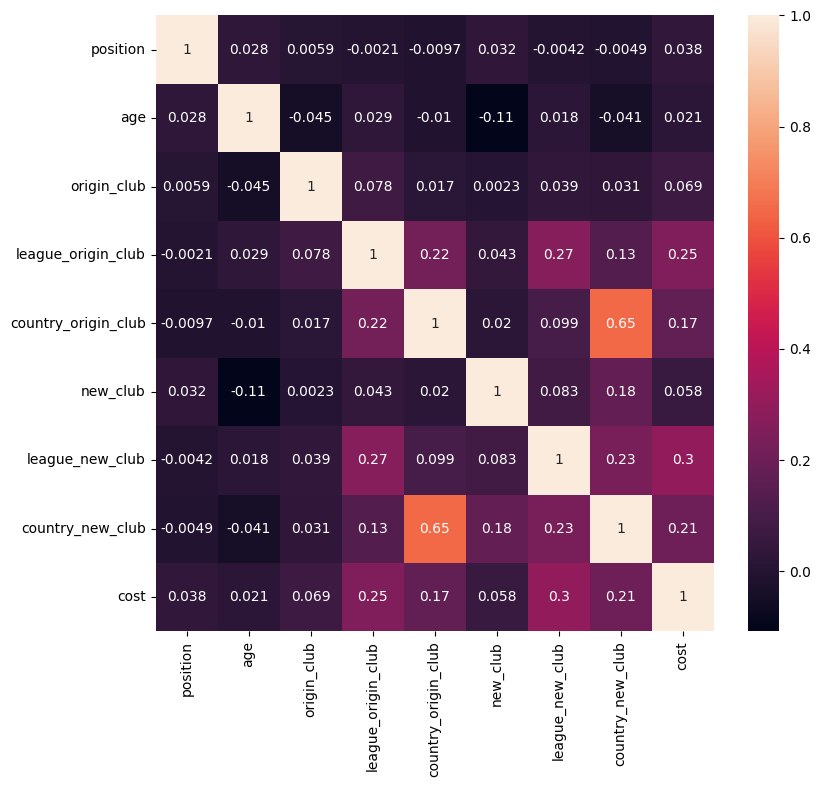

In [208]:
corrr = pd.concat([X_train,y_train],axis = 1)
corrmat = corrr.corr()
fig,ax = plt.subplots(figsize = (9,8))
sns.heatmap(corrmat ,annot=True,vmax = 1)


In [209]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor()
model2.fit(X_train, y_train)

GradientBoostingRegressor()

In [210]:
y_pred2 = model2.predict(X_test)

In [211]:
r2 = r2_score(y_test,y_pred2)
r2

NameError: name 'r2_score' is not defined